In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6228 entries, 1995-01-03 to 2019-09-26
Data columns (total 4 columns):
PG      6228 non-null float64
MSFT    6228 non-null float64
F       6228 non-null float64
GE      6228 non-null float64
dtypes: float64(4)
memory usage: 243.3 KB


In [7]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.472425,2.428365,4.327944,4.082655
1995-01-04,8.404510,2.446017,4.444389,4.082655
1995-01-05,8.285657,2.405671,4.405572,4.092661
1995-01-06,8.302632,2.446017,4.405572,4.072646
1995-01-09,8.268674,2.430887,4.483203,4.032622


In [8]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-09-20,122.239998,139.440002,9.17,9.37
2019-09-23,123.220001,139.139999,9.16,9.34
2019-09-24,123.610001,137.380005,9.11,8.97
2019-09-25,123.019997,139.360001,9.20,9.16
2019-09-26,124.309998,139.539993,9.14,9.02


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [9]:
mydata.iloc[0]

PG      8.472425
MSFT    2.428365
F       4.327944
GE      4.082655
Name: 1995-01-03 00:00:00, dtype: float64

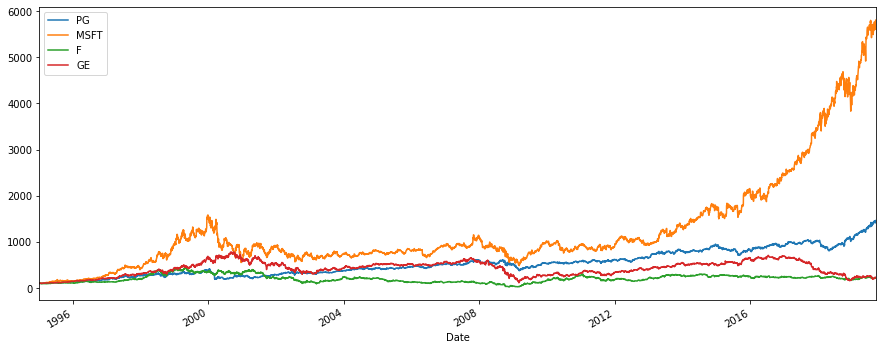

In [10]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

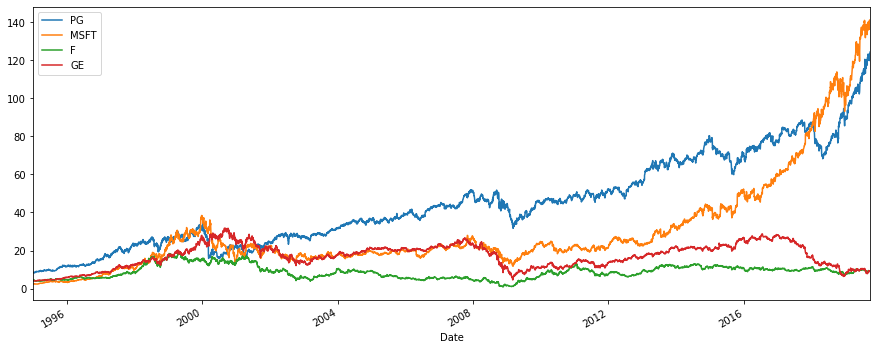

In [11]:
mydata.plot(figsize=(15,6))
plt.show()

In [12]:
mydata.loc['1995-01-03']

PG      8.472425
MSFT    2.428365
F       4.327944
GE      4.082655
Name: 1995-01-03 00:00:00, dtype: float64

In [13]:
mydata.iloc[0]

PG      8.472425
MSFT    2.428365
F       4.327944
GE      4.082655
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [14]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [15]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [16]:
np.dot(returns, weights)

array([        nan,  0.0065396 , -0.00922981, ..., -0.01363928,
        0.01017509, -0.00250695])

***

In [17]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.132528
MSFT    0.211211
F       0.107027
GE      0.077040
dtype: float64

In [18]:
np.dot(annual_returns, weights)

0.13195172016290702

In [19]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

13.195 %


***

In [20]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [21]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

13.195 %
15.740000000000002 %
